<a href="https://colab.research.google.com/github/lblogan14/hands_on_notes/blob/master/Ch4_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Using a direct “closed-form” equation that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).
* Using an iterative optimization approach, called Gradient Descent (GD), that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of Gradient Descent that we will use again and again when we study neural networks in Part II: Batch GD, Mini-batch GD,
and Stochastic GD.

#Linear Regression
##The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution, which is
the Normal Equation.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

[0, 2, 0, 15]

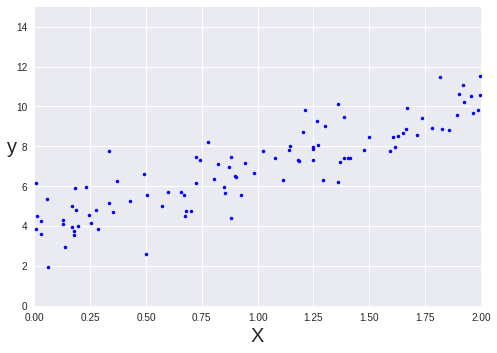

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
plt.plot(X,y,'b.')
plt.xlabel('X', fontsize=20)
plt.ylabel('y', rotation=0, fontsize=20)
plt.axis([0,2, 0,15])

For linear, regression, the normal equation is defined by

$\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In [3]:
X_b = np.c_[np.ones((100,1)), X] # add X0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.88910657],
       [3.1170918 ]])

use the **inv()** function from NumPy's Linear Algebra module **np.linalg** to compute the inverse matrix

Use $\hat{\theta}$ to predict,

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add X0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88910657],
       [10.12329017]])

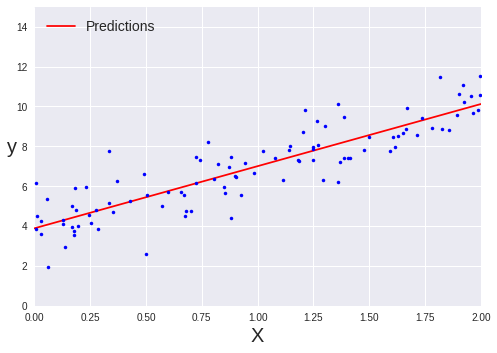

In [5]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.xlabel('X', fontsize=20)
plt.ylabel('y',rotation=0, fontsize=20)
plt.legend(loc='upper left', fontsize=14)


This is equivalent to

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88910657]), array([[3.1170918]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.88910657],
       [10.12329017]])

#Gradient Descent

##Batch Gradient Descent
Partial derivatives of the cost function,
$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum\limits_{i=1}^m (\theta^T\cdot x^i - y^i)\cdot x^i_j$

Gradient vector of the cost function,
$\nabla_\theta MSE(\theta) =\begin{bmatrix}
\frac{\partial}{\partial\theta_0}MSE(\theta)\\
\frac{\partial}{\partial\theta_1}MSE(\theta)\\
\frac{\partial}{\partial\theta_2}MSE(\theta)\\
\vdots\\
\frac{\partial}{\partial\theta_n}MSE(\theta)
\end{bmatrix}
=\frac{2}{m}X^T \cdot (X \cdot \theta - y)$

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is
called *Batch Gradient Descent*: it uses the whole batch of training data at every step.

Gradient Descent step,
$\theta^{(next step)} = \theta - \eta \nabla_\theta MSE(\theta)$, where $\eta$ is the learning rate.

In [8]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) # random initiailization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  
theta

array([[3.88910657],
       [3.1170918 ]])

If you use a different learning rate,

In [0]:
X_new_b.dot(theta)
theta_path_bgd = [] # update of theta in batch gradient descent

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X,y,'b.')
  n_iterations = 1000
  
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      
      style = 'b-' if iteration > 0 else 'r--'
      plt.plot(X_new, y_predict, style)
    
    gradients= 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    if theta_path is not None:
      theta_path.append(theta)
    
  plt.xlabel('X', fontsize=20)
  plt.ylabel('y', rotation=0, fontsize=20)
  plt.axis([0,2,0,15])
  plt.title(r'$\eta = {}$'.format(eta), fontsize=20)

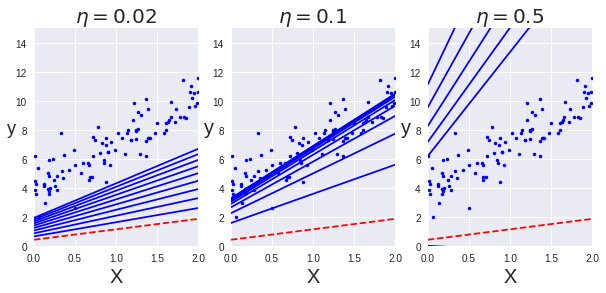

In [10]:
np.random.seed(1)
theta = np.random.rand(2,1) # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

##Stochastic Gradient Descent
*Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum.

One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called *simulated annealing*.

The function that determines the learning rate at each iteration is called the *learning schedule*.

Stochastic Gradient Descent using a simple learning schedule:

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.rand(2,1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m) #m=number of samples,
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    
theta

array([[3.91359298],
       [3.11610757]])

array([[3.92288769],
       [3.12733602]])

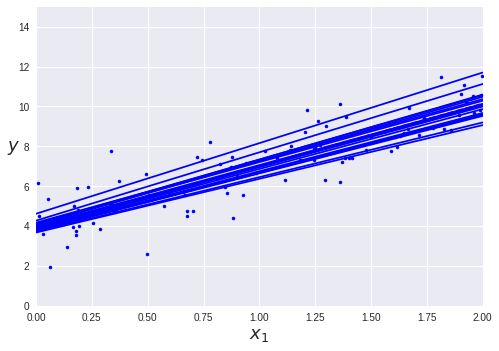

In [12]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(1)

def learning_schedule(t):
    return t0 / (t + t1)
  
for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:
      y_predict = X_new_b.dot(theta)
      style = 'b-' if i>0 else 'r--'
      plt.plot(X_new, y_predict, style)
    
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
theta

Use **SGDRegressor** to perform Linear Regression using SGD

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.87577431]), array([3.11050486]))

##Mini-batch Gradient Descent

In [0]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

In [15]:
t=0

for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for i in range(0, m, minibatch_size):
    t +=1
    xi = X_b_shuffled[i: i+minibatch_size]
    yi = y_shuffled[i: i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)
    
theta

array([[3.82964805],
       [3.05243067]])

In [0]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [17]:
theta_path_bgd.shape # theta0 and theta1

(1000, 2, 1)

In [18]:
theta_path_bgd[0] # return the 1st theta set 

array([[1.57219461],
       [2.00892474]])

[2.5, 4.5, 2.3, 3.9]

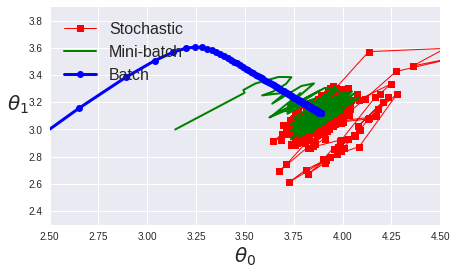

In [19]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label='Batch')
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

#Polynomial Regression

[-3, 3, 0, 10]

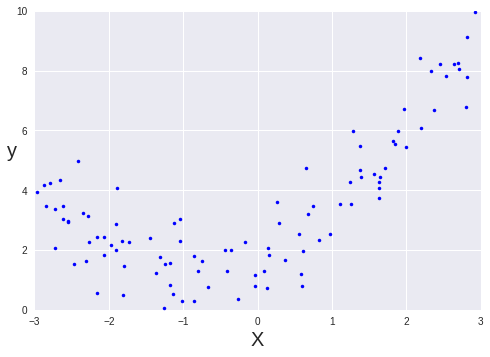

In [20]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.axis([-3,3,0,10])

Use **PolynomialFeatures** to transform training data, then use **LinearRegression()** to fit

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [22]:
X_poly[0]

array([-0.75275929,  0.56664654])

**X_poly** now contains the original feature of X and the square of this feature.

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

[-3, 3, 0, 10]

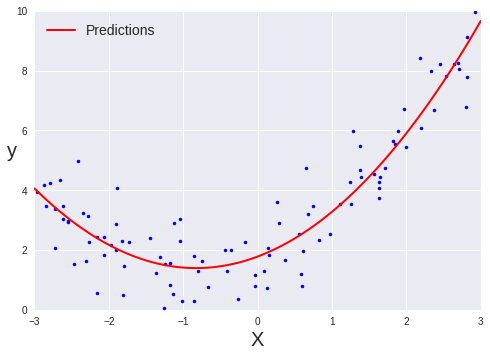

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3,3,0,10])

#Learning Curves

[-3, 3, 0, 10]

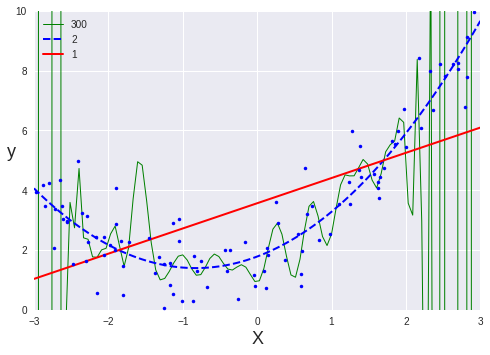

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (('g-', 1, 300), ('b--', 2, 2), ('r-+', 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
            ('poly_features', polybig_features),
            ('std_scaler', std_scaler),
            ('lin_reg', lin_reg),
        ])
    polynomial_regression.fit(X, y)
    
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('X', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

You can see that the high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it.

Cross-validation is an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.

Another way is to use the *learning curves*, which are the plots of the model's performance on the training set and the validation set as a function of the training set size.

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
  train_errors, val_errors = [], []
  
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
  plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='Train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.legend(loc='upper right', fontsize=14)
  plt.xlabel("Training set size", fontsize=14)
  plt.ylabel("RMSE", fontsize=14) 

[0, 80, 0, 3]

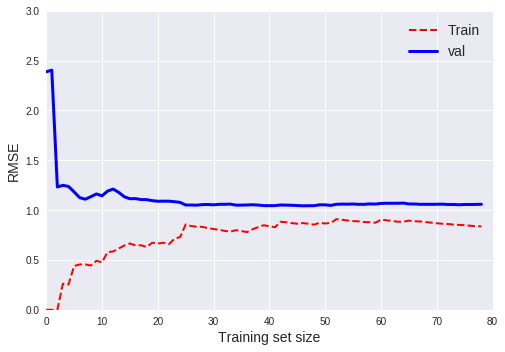

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y) 
# use X_poly instead of X because X has degree of 2, not linear pattern
plt.axis([0,80,0,3])

Look at the learning curves of a 10th-degree polynomial model at the same data,

[0, 80, 0, 3]

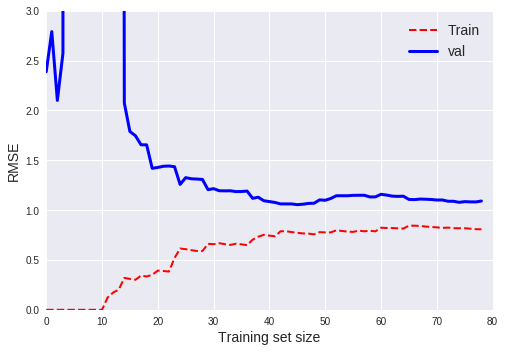

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0,80,0,3])

* The error on the training data is much lower than with the Linear Regression model.
* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer.

*One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.*

###The Bias/Variance Tradeoff

*Bias*

This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

*Variance*

This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

*Irreducible error*

This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

#Regularized Linear Models

##Ridge Regression

In [0]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

You can use **Ridge()** from **linear_model** or add **l2 penalty** to the **SGDRegressor**

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [31]:
sgd_reg = SGDRegressor(max_iter=5, penalty='l2', random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

The hyperparameter $\alpha$ controls how much you want to regularize the model

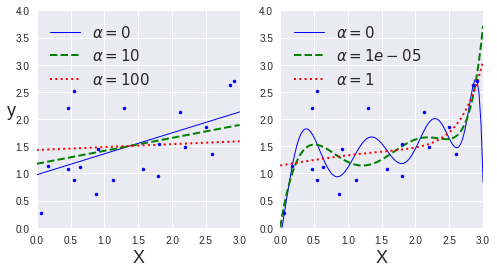

In [32]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
    model = model_class(alpha, **model_kargs) if alpha>0 else LinearRegression()
    
    if polynomial:
      model = Pipeline([
               ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
               ('std_scaler', StandardScaler()),
               ('regul_reg', model),
      ])
    
    model.fit(X,y)
    y_new_regul = model.predict(X_new)
    
    lw = 2 if alpha>0 else 1
    
    plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r'$\alpha = {}$'.format(alpha))
  
  plt.plot(X, y, 'b.', linewidth=3)
  plt.legend(loc='upper left', fontsize=15)
  plt.xlabel('X', fontsize=18)
  plt.axis([0,3, 0,4])
  
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100), random_state=42)
plt.ylabel('y', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

##Lasso Regression
*Least Absolute Shrinkage and Selection Operator Regression* (simply called Lasso Regression)

You can use **Lasso()** from **linear_model** or add **l1 penalty** to the **SGDRegressor**

In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [34]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13498188])

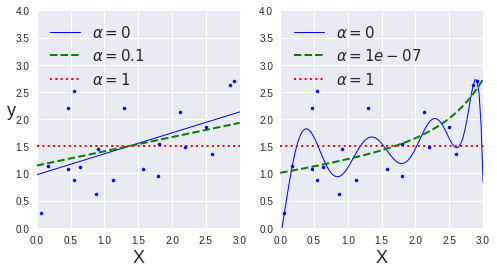

In [35]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel('y', rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero).

Lasso Regression automatically performs feature selection and outputs a *sparse model* (i.e., with few nonzero feature weights).

To get a sense of why Lasso forces a sparse model, we can plot the parameter space and see the parameter update path, using the batch gradient descent classifier as an example,

In [0]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignore the bias term
t1s = np.linspace(t1a, t1b, 500) # theta 1
t2s = np.linspace(t2a, t2b, 500) # theta 2
t1, t2 = np.meshgrid(t1s, t2s) # create a meshgrid for plotting, parameter space
Theta = np.c_[t1.ravel(), t2.ravel()] # Theta = [theta1_col, theta2_col]
Xr = np.array([[-1,1], [-0.3, -1], [1, 0.1]]) # 2 features
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:] # target
#         ^1st feature      ^2nd feature

#lost function
J = (1/len(Xr) * np.sum((Theta.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(Theta, ord=1, axis=1).reshape(t1.shape) #Lasso Norm
N2 = np.linalg.norm(Theta, ord=2, axis=1).reshape(t2.shape) #Ridge Norm

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [37]:
T.shape

NameError: ignored

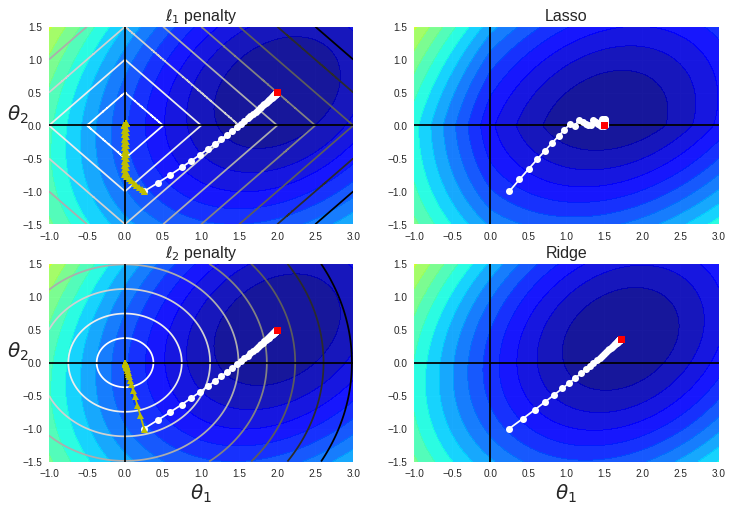

In [116]:
def bgd_path(theta, X, y, l1, l2, core=1, eta=0.1, n_iterations=50):
  path = [theta]
  for iteration in range(n_iterations):
    gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1*np.sign(theta) + 2*l2*theta
    #                                                         ^l1 regularization    ^l2 regularization
    theta = theta - eta * gradients
    path.append(theta)
  
  return np.array(path)

plt.figure(figsize=(12,8))
for i, N, l1, l2, title in((0, N1, 0.5, 0, 'Lasso'), (1, N2, 0, 0.1, 'Ridge')):
  # Resulting cost function with l1 and l2 norms
  JR = J + l1 * N1 + l2 * N2**2 
  
  tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
  t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
  
  levelsJ = (np.exp(np.linspace(0,1,20)) -1) * (np.max(J) - np.min(J)) + np.min(J)
  levelsJR = (np.exp(np.linspace(0,1,20)) -1) * (np.max(JR) - np.min(JR)) + np.min(JR)
  levelsN = np.linspace(0, np.max(N), 10)
  
  path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
  path_JR = bgd_path(t_init, Xr, yr, l1, l2)
  path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
  
  plt.subplot(221 + i*2)
  plt.grid(True)
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9, cmap='jet')
  plt.contour(t1, t2, N, levels=levelsN)
  plt.plot(path_J[:,0], path_J[:,1], 'w-o')
  plt.plot(path_N[:,0], path_N[:,1], 'y-^')
  plt.plot(t1_min, t2_min, 'rs')
  plt.title(r'$\ell_{}$ penalty'.format(i+1), fontsize=16)
  plt.axis([t1a, t1b, t2a, t2b])
  if i == 1:
    plt.xlabel(r'$\theta_1$', fontsize=20)
  plt.ylabel(r'$\theta_2$', fontsize=20, rotation=0)
  
  plt.subplot(222 + i*2)
  plt.grid(True)
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9,cmap='jet')
  plt.plot(path_JR[:,0], path_JR[:,1], 'w-o')
  plt.plot(t1r_min, t2r_min, 'rs')
  plt.title(title, fontsize=16)
  plt.axis([t1a, t1b, t2a, t2b])
  if i == 1:
    plt.xlabel(r'$\theta_1$', fontsize=20)

On the Lasso cost function, the BGD path tends to bounce across the gutter toward the end. This is because the slope changes abruptly at $\theta_2$ = 0. You need to gradually reduce the learning rate in order to actually converge to the global minimum.

##Elastic Net
a mix of the Ridge and Lasso regularizations

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [117]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

##Early Stopping
Early stopping is regularize iterative learning algorithms such as Gradient Descent to stop training as soon as the validation error reaches a minimum.

Create the dataset first, (remember to perform the appropriate preprocessing)

In [0]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2. + X + 0.5* X**2 + np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50], test_size=0.5, random_state=10)
#                                                  ^actually just use half of the dataset

#Data preparation pipeline
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

We can actually plot the learning curve to roughly label the optimal stopping point,

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(239,2.16246,'Best model')

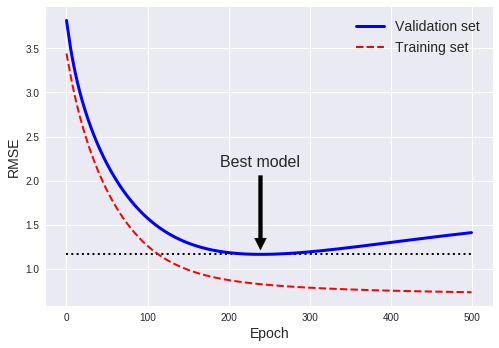

In [43]:
sgd_reg = SGDRegressor(max_iter=1, 
                        penalty=None, 
                        eta0=0.0005, 
                        warm_start=True, 
                        learning_rate='constant',
                        random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epochs in range(n_epochs):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))
  
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

# plot the learning curve
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], 'k:', linewidth=2)
plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation set')
plt.plot(np.sqrt(train_errors), 'r--', linewidth=2, label='Training set')
plt.legend(loc='upper right', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('RMSE', fontsize=14)

# annotate the minimum validation error
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse+1),
            ha='center',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            )

*With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.*

A simple implementation of early stopping, using **clone** in sklearn,

In [44]:
from sklearn.base import clone

sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3

One thing to notice is that the kwarg **warm_start=True**. This kwarg means that when the **fit()** method is called, it just continues
training where it left off instead of restarting from scratch.

In [45]:
best_epoch, best_model

(227, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=None, n_iter=1, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=True))

#Logistic Regression
*Logistic Regression* is commonly used to estimate the probability that an instance belongs to a particular class.

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

$\hat{p}=h_{\theta}(X)=\sigma(\theta^{T} \cdot X)$

where $\sigma(\cdot)$ is the sigmoid function

$\sigma(t)= \frac{1}{1 + \exp(-t)}$

[-10, 10, -0.1, 1.1]

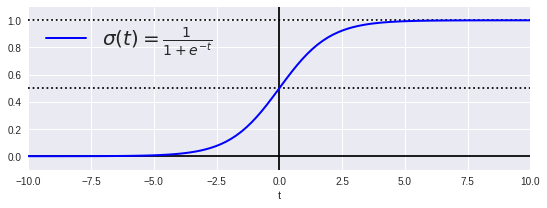

In [46]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

##Training and Cost Function
The cost function of logistic regression is,

$J(\theta)=-\frac{1}{m}\sum\limits_{i=1}^m[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1- \hat{p}^{(i)})]$

##Decision Boundaries
Use the iris dataset to illustrate Logistic Regression

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [49]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [0]:
X = iris['data'][:,3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm, 

[0, 3, -0.02, 1.02]

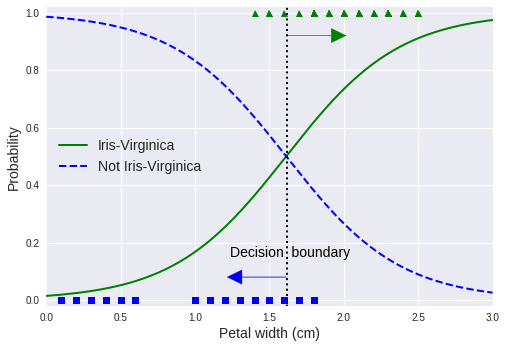

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
#                               ^this reshape the data to have a shape of [1000, 1], each represent a smaple
y_proba = log_reg.predict_proba(X_new)
# ^return probabilities for each classes, [1000, 2]
plt.plot(X_new, y_proba[:,1], 'g-', linewidth=2, label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--', linewidth=2, label='Not Iris-Virginica')

# Further implement the plot
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:', linewidth=2)
plt.text(decision_boundary+0.02,  0.15, 'Decision  boundary', fontsize=14, color='k', ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [65]:
decision_boundary

array([1.61561562])

In [66]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Now we can select the petal width and petal length to perform Logistic Regression,

In [0]:
from sklearn.linear_model import LogisticRegression

X = iris['data'][:,(2, 3)]
y = (iris['target'] == 2).astype(np.int)

In [69]:
log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

The hyperparameter controlling the regularization strength of a Scikit-Learn **LogisticRegression** model is not **alpha** (as in other linear models), but its inverse: **C**. The higher the value of **C**, the less the model is regularized.

[2.9, 7, 0.8, 2.7]

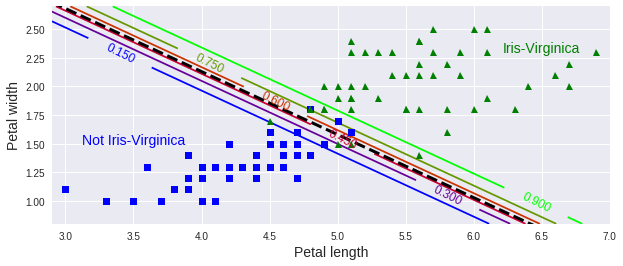

In [73]:
# create feasure space
x0, x1 = np.meshgrid(
                   np.linspace(2.9, 7, 500).reshape(-1, 1),
                   np.linspace(0.8, 2.7, 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()] # create input with 2 features in each sample data
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary.

Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.

##Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers.

When given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the somax function to the scores.

Softmax score for class k,
$s_k(X) = \theta_{k}^{T} \cdot X$

Note that each class has its own dedicated parameter vector $\theta_k$. All these vectors are typically stored as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance X, you can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function,

Softmax function, 
$\hat{p}_k = \sigma(s(X))_k = \frac{\exp(s_k(X))}{\sum\limits_{j=1}^K \exp(s_j(X))}$

where
* K is the number of classes
* $s(X)$ is a vector containing the scores of each class for the instance X
* $\sigma(s(X))$ is the estimated probability that the instance X belongs to class k given the scores of each class for that instance


The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. *Cannot use it to recognize multiple people in one picture.*

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

Cross entropy cost function,

$J(\Theta)=- \frac{1}{m} \sum\limits_{i=1}^m \sum\limits_{j=1}^K y_{j}^{(i)} \log(\hat{p}_{j}^{(i)})$

where $y_{j}^{(i)}$ is equal to 1 if the target class for the i-th instance is j; otherwise, it is equal to 0

Use Softmax Regression to classify the iris flowers into all three classes.

**LogisticRegression** uses one-versus-all by default for multi-class classification problem. Set the **multi_class** hyperparameter to **'multinomial'** to switch it to Softmax Regression.

Also need to specify a solver that supports Softmax Regression, such as the **'lbfgs'** solver.

It also applies l2 regularization by default, which can be controlled using the hyperparameter **C**.

In [74]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

An iris with 5 cm long and 2 cm wide petals,

In [75]:
softmax_reg.predict([[5, 2]])

array([2])

In [76]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

We can also plot the resulting decision boundaries, represented by the background colors.

[0, 7, 0, 3.5]

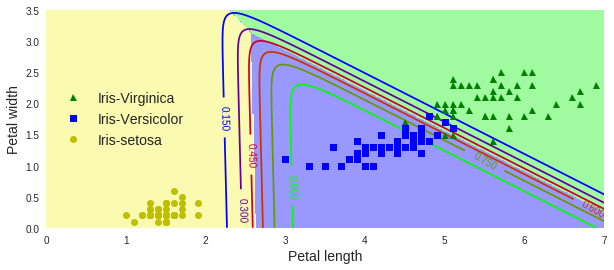

In [80]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1,1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label='Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label='Iris-Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label='Iris-setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])